In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer(as_frame=True)

In [7]:
df = data.frame

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [17]:
X = df.drop("target",axis=1)
y = df["target"]

In [19]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
columns = data.feature_names

In [39]:
X_train = pd.DataFrame(X_train, columns = columns)

In [41]:
X_test = pd.DataFrame(X_test, columns = columns)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
logistic = LogisticRegression()
gbc = GradientBoostingClassifier()

In [47]:
logistic.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
print("logistic regression")

y_pred_logistic = logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

print("-------------------")
print("gradient boosting classifier")

y_pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

logistic regression
1.0
[[40  0]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

-------------------
gradient boosting classifier
0.9824561403508771
[[40  0]
 [ 2 72]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [53]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=4)

In [65]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [67]:
X_train_pca = pd.DataFrame(X_train_pca, columns = ["PC 1", "PC 2", "PC 3", "PC 4"])
X_test_pca = pd.DataFrame(X_test_pca, columns = ["PC 1", "PC 2", "PC 3", "PC 4"])

In [69]:
X_train_pca

,PC 1,PC 2,PC 3,PC 4
0,-2.069024,-0.226280,-1.844833,-0.988412
1,-2.885951,-2.570625,-0.838729,0.065086
2,-2.446595,-0.758386,-1.786889,-1.812832
3,-2.522630,0.316767,1.775163,1.999111
4,10.731272,1.512369,-1.314061,2.454815
...,...,...,...,...
450,0.732048,3.534138,0.618423,-0.103857
451,-1.326413,0.580326,2.722605,0.369228
452,-1.836679,-1.510046,1.520438,0.382986
453,2.004704,-4.496126,0.507539,-1.242993


In [71]:
logistic = LogisticRegression()
gbc = GradientBoostingClassifier()

In [73]:
logistic.fit(X_train_pca, y_train)
gbc.fit(X_train_pca, y_train)

GradientBoostingClassifier()

In [75]:
print("logistic regression")

y_pred_logistic = logistic.predict(X_test_pca)
print(accuracy_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

print("-------------------")
print("gradient boosting classifier")

y_pred_gbc = gbc.predict(X_test_pca)
print(accuracy_score(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

logistic regression
1.0
[[40  0]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

-------------------
gradient boosting classifier
0.9649122807017544
[[38  2]
 [ 2 72]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [77]:
X = df.drop("target", axis = 1)

In [79]:
scaler = StandardScaler()

In [81]:
X = scaler.fit_transform(X)

In [83]:
pca = PCA(n_components=2)

In [85]:
X = pca.fit_transform(X)

In [87]:
X = pd.DataFrame(X, columns = ["PC1", "PC2"])

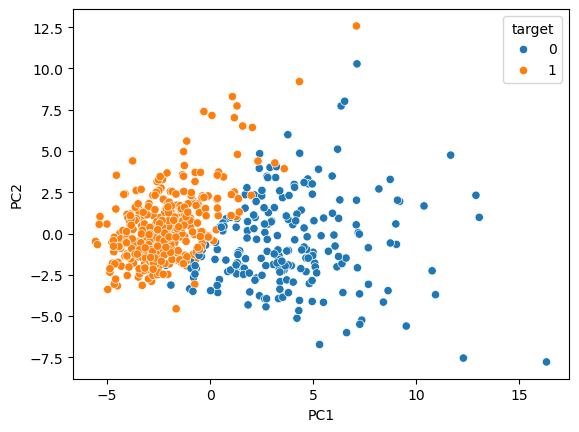

In [89]:
sns.scatterplot(data = X, x = "PC1", y="PC2", hue=df["target"])
plt.show()